### 6(b). Take a binary image & a structuring element, perform Opening & Closing morphological operations.

### Import Necessary Libraries

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

### Loading the Original Image

shape of the original image: (238, 315)


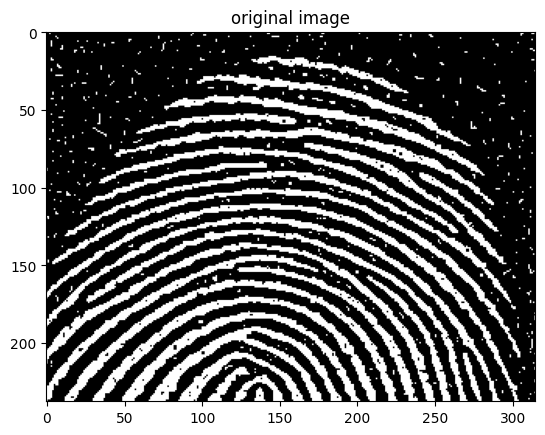

min pixel intensity: 0
max pixel intensity: 255


In [2]:
original_image = cv2.imread('./images/finger_print.tif', 0)
print(f"shape of the original image: {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title('original image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

### Function for calculating Erosion

In [5]:
def erosion(input_image, st_element):
    output_image = input_image.copy()
    st_element = st_element*255
    
    #calculte padding offset
    st_offset = st_element.shape[0]//2
    image_height, image_width = input_image.shape
    
    #iterate over every pixel in the image
    for row in range(image_height):
        for col in range(image_width):
            is_fit = True
            
            #iterate over the structuring element
            for dx in range(-st_offset, st_offset+1):
                for dy in range(-st_offset, st_offset+1):
                    st_row = dx + st_offset
                    st_col = dy + st_offset
                    
                    #calculate image pixel location 
                    img_row = row + dx
                    img_col = col + dy
                    
                    #check if the position is inside image boundaries
                    if 0<=img_row<image_height and 0<=img_col<image_width:
                        if st_element[st_row, st_col] == 255 and input_image[img_row, img_col] != 255:
                            is_fit = False
                    #If the structuring element expects foreground but we're outside the image  
                    elif st_element[st_row, st_col] == 255:
                        is_fit = False
            output_image[row][col] = 255 if is_fit else 0
    
    return np.uint8(output_image)                    
                          
                             

### Function for Calculating Dilation

In [7]:
def dilation(image, st_element):
    # Create a black output image of the same size
    dilated_image = np.zeros_like(image)
    
    # Scale structuring element to 255 values (foreground)
    st_element = st_element * 255
    
    # Compute half size of structuring element for offset
    offset = st_element.shape[0] // 2
    height, width = image.shape
    
    # Iterate through every pixel in the image
    for row in range(height):
        for col in range(width):
            is_hit = False
            
            # Loop through each value in the structuring element
            for dx in range(-offset, offset + 1):
                for dy in range(-offset, offset + 1):
                    # Corresponding coordinates
                    img_row = row + dx
                    img_col = col + dy
                    st_row = dx + offset
                    st_col = dy + offset
                    
                    # Check for valid coordinates
                    if 0 <= img_row < height and 0 <= img_col < width:
                        # If SE has 255 and image at that position is 255 → it's a hit
                        if st_element[st_row, st_col] == 255 and image[img_row, img_col] == 255:
                            is_hit = True
                            break
                if is_hit:
                    break
            
            # Set output pixel to 255 if any hit is found
            dilated_image[row, col] = 255 if is_hit else 0
    
    return np.uint8(dilated_image)

### Function for Operning(erosion followed by dilation )

In [8]:
def opening(image, st_element):
    return dilation(erosion(image, st_element), st_element)

### Function for Closing (dilation followed by erosion)

In [9]:
def closing(image, st_element):
    return erosion(dilation(image, st_element), st_element)

### Apply Opening


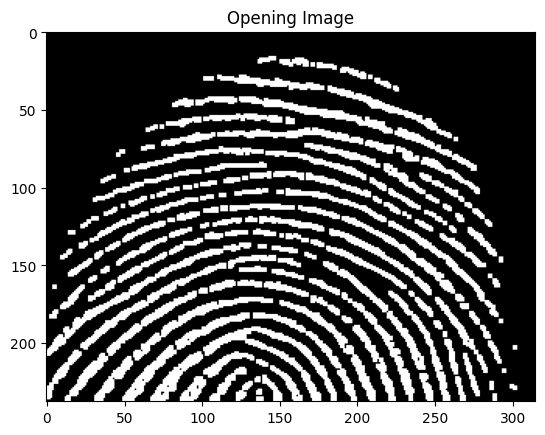

In [10]:
st_element = np.ones((3,3))
opening_image = opening(original_image, st_element)
plt.imshow(opening_image, cmap='gray')
plt.title('Opening Image')
plt.show()

### Apply Closing

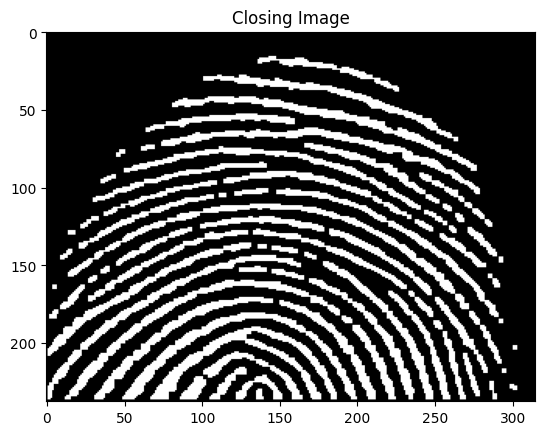

In [11]:
st_element = np.ones((3,3))
closing_image = closing(opening_image, st_element)
plt.title('Closing Image')
plt.imshow(closing_image, cmap='gray')
plt.show()